In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()

In [2]:
data = pd.read_csv('applications data.csv')

In [3]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [4]:
print(mem_usage(data))

244.69 MB


In [5]:
data.shape

(1000000, 10)

In [6]:
data.describe(include='all')

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1.000000e+06,1000000,1000000,1000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
unique,NaN,NaN,NaN,78136,177001,828774,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,EAMSTRMT,ERJSAXA,123 MAIN ST,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,12658,8580,1079,NaN,NaN,NaN,NaN
mean,500000.500000,2.017067e+07,5.083415e+08,NaN,NaN,NaN,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278933,3.449869e+02,2.934864e+08,NaN,NaN,NaN,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,2.017010e+07,3.600000e+01,NaN,NaN,NaN,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.017040e+07,2.542176e+08,NaN,NaN,NaN,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,2.017070e+07,5.088144e+08,NaN,NaN,NaN,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,2.017100e+07,7.630924e+08,NaN,NaN,NaN,74496.000000,1.983032e+07,8.109241e+09,0.000000


In [7]:
data.dtypes

record          int64
date            int64
ssn             int64
firstname      object
lastname       object
address        object
zip5            int64
dob             int64
homephone       int64
fraud_label     int64
dtype: object

In [8]:
data['record'] = data['record'].astype(int)

In [9]:
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20170101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20170101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20170101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20170101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20170101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
5,6,20170101,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
6,7,20170101,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
7,8,20170101,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
8,9,20170101,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0
9,10,20170101,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0


In [10]:
data['appyear'] = (data['date'] / 10000).astype('int')
data['appmonth'] = ((data['date'] - data['appyear'] * 10000) / 100).astype('int')
data['appday'] = data['date'] - data['appyear'] * 10000 - data['appmonth'] * 100
data['date'] = pd.to_datetime(data.appyear*10000+data.appmonth*100+data.appday,format='%Y%m%d')
data = data.drop(columns = ['appyear','appmonth','appday'])

In [11]:
data.dtypes

record                  int64
date           datetime64[ns]
ssn                     int64
firstname              object
lastname               object
address                object
zip5                    int64
dob                     int64
homephone               int64
fraud_label             int64
dtype: object

In [12]:
data.head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [13]:
data.tail(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
999995,999996,2017-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0
999996,999997,2017-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0
999997,999998,2017-12-31,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0
999998,999999,2017-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0
999999,1000000,2017-12-31,40027083,RXZXSMEZA,UTEAAZXU,112 UTTJT PL,39491,19820826,5869926905,0


In [14]:
data.describe()

,record,ssn,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,500000.500000,5.083415e+08,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278933,2.934864e+08,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,3.600000e+01,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.542176e+08,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,5.088144e+08,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,7.630924e+08,74496.000000,1.983032e+07,8.109241e+09,0.000000
max,1000000.000000,1.000000e+09,99999.000000,2.016103e+07,1.000000e+10,1.000000


In [15]:
data.count()

record         1000000
date           1000000
ssn            1000000
firstname      1000000
lastname       1000000
address        1000000
zip5           1000000
dob            1000000
homephone      1000000
fraud_label    1000000
dtype: int64

In [16]:
data['fraud_label'].sum()

14393

In [17]:
goods = data[data['fraud_label'] == 0]
bads = data[data['fraud_label'] == 1]

In [18]:
numrecords = len(data)
print(numrecords)

1000000


In [19]:
print(len(goods))

985607


In [20]:
print(len(bads))

14393


In [21]:
print(len(goods) + len(bads))

1000000


In [22]:
len(data['record'].unique())

1000000

In [23]:
len(data['record']) * 100 / numrecords

100.0

In [24]:
len(data['date']) * 100 / numrecords

100.0

In [25]:
len(data['date'].unique())

365

In [26]:
count_day = data.groupby('date').count()
count_day.head(10)

,record,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
date,,,,,,,,,
2017-01-01,2840,2840,2840,2840,2840,2840,2840,2840,2840
2017-01-02,2719,2719,2719,2719,2719,2719,2719,2719,2719
2017-01-03,2764,2764,2764,2764,2764,2764,2764,2764,2764
2017-01-04,2757,2757,2757,2757,2757,2757,2757,2757,2757
2017-01-05,2732,2732,2732,2732,2732,2732,2732,2732,2732
2017-01-06,2682,2682,2682,2682,2682,2682,2682,2682,2682
2017-01-07,2782,2782,2782,2782,2782,2782,2782,2782,2782
2017-01-08,2809,2809,2809,2809,2809,2809,2809,2809,2809
2017-01-09,2779,2779,2779,2779,2779,2779,2779,2779,2779


<AxesSubplot:title={'center':'Daily Applications'}, xlabel='date'>

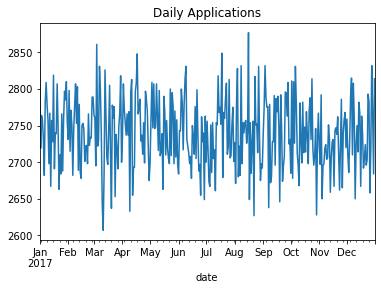

In [27]:
daily_count = data.assign(trx = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 1))\
    .count().trx
daily_count.plot(title = 'Daily Applications')

In [28]:
daily_count.head(70)

date
2017-01-01    2840
2017-01-02    2719
2017-01-03    2764
2017-01-04    2757
2017-01-05    2732
              ... 
2017-03-07    2831
2017-03-08    2798
2017-03-09    2738
2017-03-10    2643
2017-03-11    2607
Freq: D, Name: trx, Length: 70, dtype: int64

In [29]:
# daily_count['2016-02-29'] = daily_count['2016-02-28']
# daily_count.head(70)

<AxesSubplot:title={'center':'Daily Applications'}, xlabel='date'>

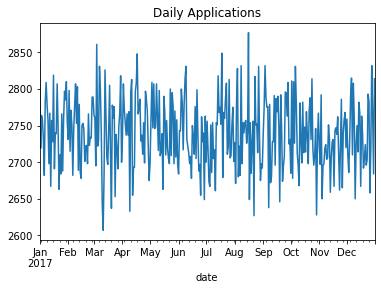

In [30]:
daily_count.plot(title = 'Daily Applications')

<AxesSubplot:title={'center':'Daily Applicationss'}, xlabel='date'>

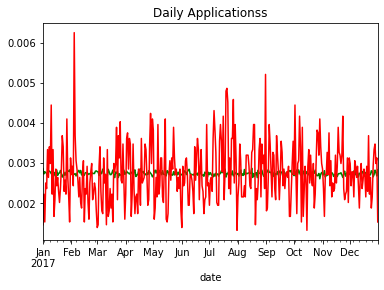

In [31]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Applicationss', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

<AxesSubplot:title={'center':'Weekly Applications'}, xlabel='date'>

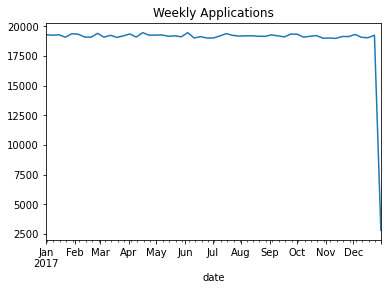

In [32]:
weekly_applications = data.assign(trx = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 7))\
    .count().trx
weekly_applications.plot(title = 'Weekly Applications')

In [33]:
weekly_applications.head(60)

date
2017-01-01    19276
2017-01-08    19235
2017-01-15    19272
2017-01-22    19068
2017-01-29    19363
2017-02-05    19318
2017-02-12    19081
2017-02-19    19067
2017-02-26    19392
2017-03-05    19069
2017-03-12    19227
2017-03-19    19051
2017-03-26    19178
2017-04-02    19340
2017-04-09    19080
2017-04-16    19448
2017-04-23    19237
2017-04-30    19243
2017-05-07    19253
2017-05-14    19147
2017-05-21    19183
2017-05-28    19102
2017-06-04    19451
2017-06-11    19003
2017-06-18    19114
2017-06-25    18997
2017-07-02    19004
2017-07-09    19174
2017-07-16    19370
2017-07-23    19219
2017-07-30    19162
2017-08-06    19182
2017-08-13    19189
2017-08-20    19144
2017-08-27    19141
2017-09-03    19260
2017-09-10    19179
2017-09-17    19095
2017-09-24    19328
2017-10-01    19321
2017-10-08    19069
2017-10-15    19148
2017-10-22    19203
2017-10-29    18984
2017-11-05    18997
2017-11-12    18967
2017-11-19    19127
2017-11-26    19120
2017-12-03    19297
2017-12-10    1

<AxesSubplot:title={'center':'Weekly Applications'}, xlabel='date'>

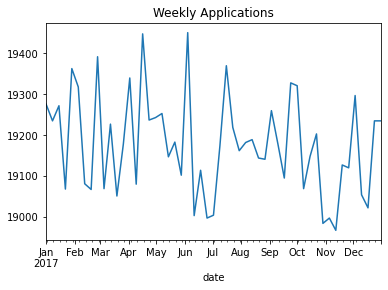

In [34]:
weekly_applications['2017-12-31'] = weekly_applications['2017-12-24']
weekly_applications.plot(title = 'Weekly Applications')

<AxesSubplot:title={'center':'Weeky Applications'}, xlabel='date'>

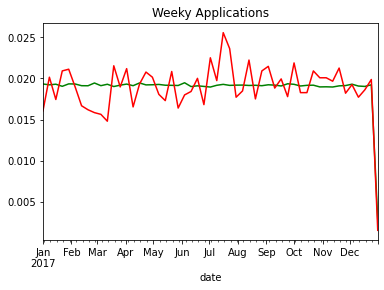

In [35]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 7)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Applications', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 7)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

In [36]:
len(data['ssn']) * 100 / numrecords

100.0

In [37]:
len(data['ssn'].unique())

835819

In [38]:
data['ssn'].value_counts()

999999999    16935
938972725      114
810776805       81
829352390       74
473311863       44
             ...  
571979227        1
154696808        1
962389432        1
746697518        1
361232148        1
Name: ssn, Length: 835819, dtype: int64

<AxesSubplot:>

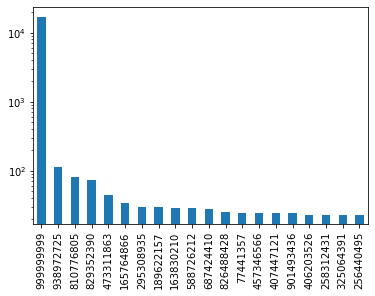

In [39]:
data['ssn'].value_counts().head(20).plot(kind='bar',logy=True)

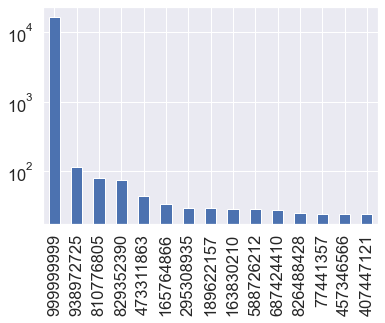

In [40]:
sns.set(font_scale=1.5)
data['ssn'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')

In [41]:
data[data['ssn'] == 999999999].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
10,11,2017-01-01,999999999,UZZSMXSEE,USJZUSA,726 UMTXU ST,92129,19400126,3026547212,0
22,23,2017-01-01,999999999,ETXMUSZEM,UJMAMEU,3387 STRUM WY,45982,19580830,5568704443,0
64,65,2017-01-01,999999999,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,19070626,9999999999,0
68,69,2017-01-01,999999999,UUZAJXZMT,SRAAMZXU,2557 URRXS DR,98407,20110831,5490098836,0
74,75,2017-01-01,999999999,AUATMMZX,UUUTAZR,30 ETXRM ST,38402,19760625,2382673773,0
283,284,2017-01-01,999999999,MSJUZSMZJ,UXMTEZUT,356 UZSRE AVE,74187,19070626,153492955,0
380,381,2017-01-01,999999999,XRJSMRRRT,RMRXAMX,9769 UAMZJ DR,52351,19070626,3181686949,0
420,421,2017-01-01,999999999,XRXMTMZEZ,SZRXXJMX,5854 RXRXX PL,34957,19970721,316681200,0
446,447,2017-01-01,999999999,RRZUZUSX,ESZRRRAA,8970 AXME RD,48333,19110729,5350782211,0
468,469,2017-01-01,999999999,XETRJXESR,SSJXTUJM,6995 RMSST CT,48162,19700418,2503172355,0


In [42]:
len(data[data['ssn'] == 999999999])

16935

In [43]:
data.loc[data['ssn'] == 999999999, 'ssn'] = data.loc[data['ssn'] == 999999999, 'record']

In [44]:
len(data[data['ssn'] == 999999999])

0

In [45]:
data.head(25)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0


<AxesSubplot:>

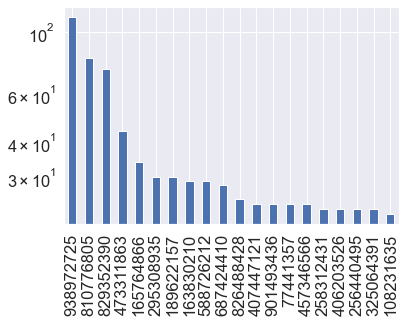

In [46]:
data['ssn'].value_counts().head(20).plot(kind='bar',logy=True)

In [47]:
len(data['firstname']) * 100 / numrecords

100.0

In [48]:
len(data['firstname'].unique())

78136

In [49]:
data['firstname'].value_counts()

EAMSTRMT     12658
TXEMXZZM     10297
UXXJJZTUZ    10235
UJSRSMUEZ     9994
SREZUJMJU     9688
             ...  
TUSSMZJA         1
SSAZJXSRM        1
UATETTATJ        1
UASJMZXZJ        1
RUZUJJRMX        1
Name: firstname, Length: 78136, dtype: int64

<AxesSubplot:>

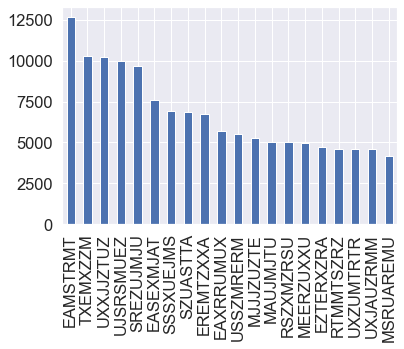

In [50]:
data['firstname'].value_counts().head(20).plot(kind='bar')

In [51]:
len(data['lastname']) * 100 / numrecords

100.0

In [52]:
len(data['lastname'].unique())

177001

In [53]:
data['lastname'].value_counts()

ERJSAXA     8580
UMXUUUSE    7156
UMARRMA     6832
MEAXJUX     5492
XMERRR      5451
            ... 
RMJZJRMJ       1
SSUTSMUM       1
EXASZEXS       1
UERZXTTR       1
RMJZURRS       1
Name: lastname, Length: 177001, dtype: int64

<AxesSubplot:>

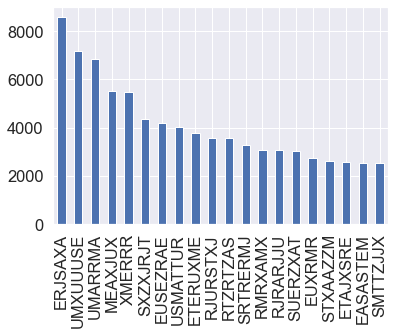

In [54]:
data['lastname'].value_counts().head(20).plot(kind='bar')

In [55]:
len(data['address']) * 100 / numrecords

100.0

In [56]:
len(data['address'].unique())

828774

In [57]:
data['address'].value_counts()

123 MAIN ST        1079
1775 XJXE LN         97
7433 RAEZA ST        80
8911 MZSU DR         74
4907 RRAAU DR        73
                   ... 
1179 RATUS BLVD       1
8006 SSRJM ST         1
6327 MAXR ST          1
4937 ESAMR LN         1
3408 UZZAM WY         1
Name: address, Length: 828774, dtype: int64

<AxesSubplot:>

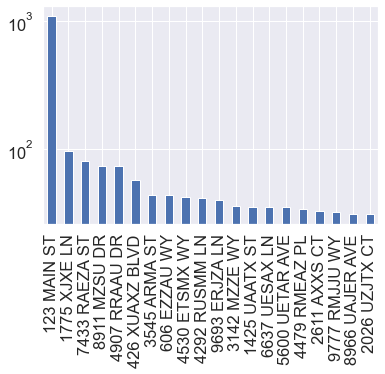

In [58]:
data['address'].value_counts().head(20).plot(kind='bar',logy=True)

In [59]:
data[data['address'] == '123 MAIN ST'].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
1247,1248,2017-01-01,904524264,UJSRSMUEZ,EAXAXAXA,123 MAIN ST,68138,19241031,8135264540,0
2191,2192,2017-01-01,345413970,XXSMUSEJT,SRRAXESJ,123 MAIN ST,68138,19300526,94097353,0
2529,2530,2017-01-01,821839005,UXZUMTRTR,EARTMRJS,123 MAIN ST,68138,19621101,7715547340,0
3434,3435,2017-01-02,24205988,SXTUZZXAS,UJJAJMM,123 MAIN ST,68138,19640428,8788942828,0
3750,3751,2017-01-02,623763056,SEZESJMSR,UZJEUZMT,123 MAIN ST,68138,19731107,974228226,0
4715,4716,2017-01-02,686787130,SXXSZJMM,ARRZTAA,123 MAIN ST,68138,19810323,1839236819,1
5353,5354,2017-01-02,932938215,UXRJESTM,EETAEAR,123 MAIN ST,68138,19980513,5441682419,0
7299,7300,2017-01-03,417080344,SJETUJAAZ,REMJTREU,123 MAIN ST,92821,19340914,7507186577,0
8512,8513,2017-01-04,477797652,EAMSTRMT,UTXXZZET,123 MAIN ST,68138,19190519,5922864904,0
8750,8751,2017-01-04,6367698,XUERJXSTU,EERMEXAE,123 MAIN ST,42035,19821127,6442565981,0


In [60]:
len(data['zip5']) * 100 / numrecords

100.0

In [61]:
len(data['zip5'].unique())

26370

In [62]:
data['zip5'].value_counts()

68138    823
90042    514
89835    489
35227    478
14931    459
        ... 
1599       1
69474      1
51017      1
25995      1
21226      1
Name: zip5, Length: 26370, dtype: int64

<AxesSubplot:>

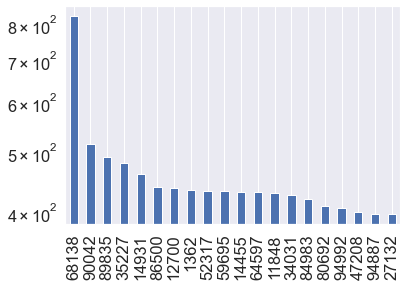

In [63]:
data['zip5'].value_counts().head(20).plot(kind='bar',logy=True)

In [64]:
data['fulladdress'] = data['address'] + ' ' + data['zip5'].astype('str')
# data = data.drop(columns = ['zip5', 'address'])

<AxesSubplot:>

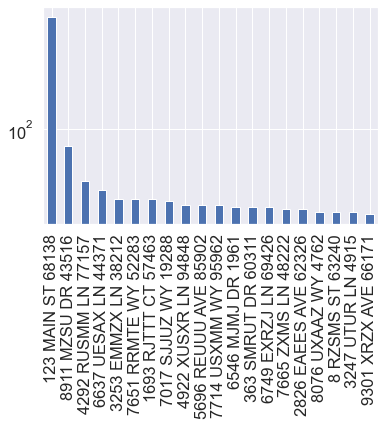

In [65]:
data['fulladdress'].value_counts().head(20).plot(kind='bar',logy=True)

In [66]:
old_address = [data.iloc[1247]['address'],data.iloc[2191]['address'],data.iloc[2529]['address']]
print(old_address)

['123 MAIN ST', '123 MAIN ST', '123 MAIN ST']


In [67]:
len(data[data['address'] == '123 MAIN ST'])

1079

In [68]:
data.loc[data['address'] == '123 MAIN ST', 'address'] = data.loc[data['address'] == '123 MAIN ST', 'record'].astype('str')

In [69]:
len(data[data['address'] == '123 MAIN ST'])

0

In [70]:
new_address = [data.iloc[1247]['address'],data.iloc[2191]['address'],data.iloc[2529]['address']]
print(new_address)

['1248', '2192', '2530']


In [71]:
data['fulladdress'] = data['address'] + ' ' + data['zip5'].astype('str')
# data = data.drop(columns = ['zip5', 'address'])

<AxesSubplot:>

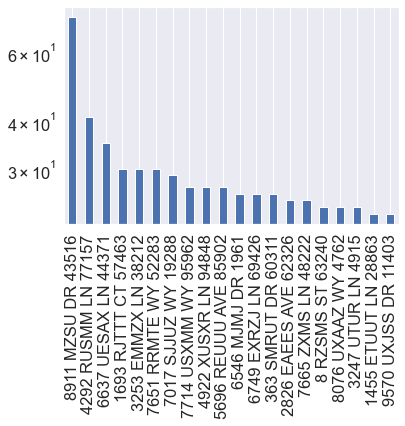

In [72]:
data['fulladdress'].value_counts().head(20).plot(kind='bar',logy=True)

In [73]:
len(data['dob']) * 100 / numrecords

100.0

In [74]:
len(data['dob'].unique())

42673

In [75]:
data['dob'].value_counts()

19070626    126568
19640318      4818
19760625      3723
19880628      1404
19740216       980
             ...  
19280730         5
19860313         5
19190223         5
19441127         5
19960904         5
Name: dob, Length: 42673, dtype: int64

<AxesSubplot:>

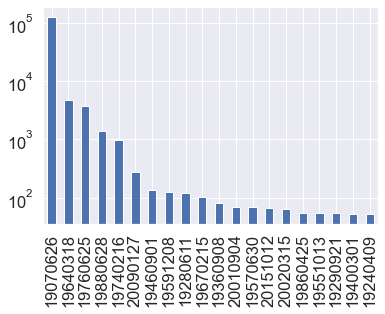

In [76]:
data['dob'].value_counts().head(20).plot(kind='bar',logy=True)

In [77]:
data.loc[data['dob'] == 19070626, 'dob'] = data.loc[data['dob'] == 19070626, 'record']

<AxesSubplot:>

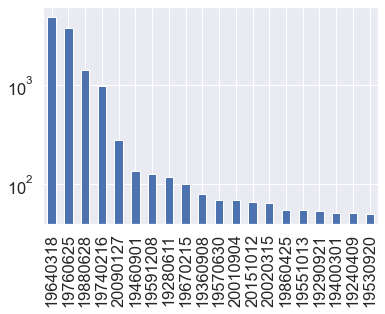

In [78]:
data['dob'].value_counts().head(20).plot(kind='bar',logy=True)

In [79]:
len(data['homephone']) * 100 / numrecords

100.0

In [80]:
len(data['homephone'].unique())

28244

In [81]:
data['homephone'].value_counts()

9999999999    78512
6384782007      466
6035129044      360
2113738531      331
4024680535      198
              ...  
3450484388        1
5376503138        1
7106175831        1
5010200060        1
6271618925        1
Name: homephone, Length: 28244, dtype: int64

<AxesSubplot:>

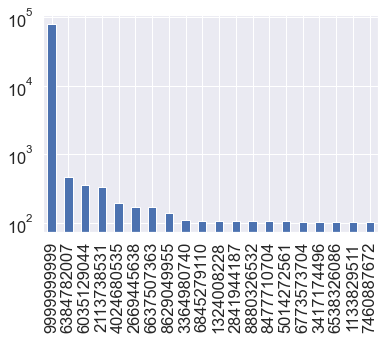

In [82]:
data['homephone'].value_counts().head(20).plot(kind='bar',logy=True)

In [83]:
data[data['homephone'] == 9999999999].head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,fulladdress
17,18,2017-01-01,346374636,XRSSZZUXT,ETXZXJAJ,5719 UEZJT PL,51486,19500110,9999999999,0,5719 UEZJT PL 51486
26,27,2017-01-01,735495403,EMSSTSXUA,STZRUXZM,9323 STRMS PL,51395,19881111,9999999999,0,9323 STRMS PL 51395
60,61,2017-01-01,780136117,UZTZEETU,ARUZTZM,5317 UTXME ST,37840,19731129,9999999999,0,5317 UTXME ST 37840
64,65,2017-01-01,65,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,65,9999999999,0,6393 UEJEA LN 41640
145,146,2017-01-01,671506143,TXEMXZZM,SRTERSRA,5795 UMUTM BLVD,45077,19030913,9999999999,0,5795 UMUTM BLVD 45077
149,150,2017-01-01,149112205,EZTERXZRA,EERMAXJU,2249 XXAU DR,27375,19841206,9999999999,0,2249 XXAU DR 27375
178,179,2017-01-01,507916615,EUEJUURAR,XUSMXRU,8314 XXMX DR,398,19720416,9999999999,0,8314 XXMX DR 398
179,180,2017-01-01,106080337,SRARXRMRM,UTJMRJUX,8413 URUEU WY,15746,180,9999999999,0,8413 URUEU WY 15746
180,181,2017-01-01,291680381,MUSXJTSSX,EXAAJUT,9762 SXJXM LN,41694,19620504,9999999999,0,9762 SXJXM LN 41694
200,201,2017-01-01,13382014,EAMSTRMT,RURSXSXX,372 SXTEA DR,42716,201,9999999999,0,372 SXTEA DR 42716


In [84]:
len(data[data['homephone'] == 9999999999])

78512

In [85]:
data.loc[data['homephone'] == 9999999999, 'homephone'] = data.loc[data['homephone'] == 9999999999, 'record']

In [86]:
len(data[data['homephone'] == 9999999999])

0

In [87]:
data.head(30)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,fulladdress
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1,1797504115,0,6861 EUTST PL 2765
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,7280 URASA PL 57169
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,3,216537580,0,5581 RSREX LN 56721
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0,1387 UJZXJ RD 35286
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0,279 EAASA WY 3173
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0,4322 USJXU LN 8391
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0,478 EEXUM LN 41640
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0,8906 UUAJ PL 60567
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0,8266 SSEAR RD 37934
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0,9166 XXSAZ PL 93751


<AxesSubplot:>

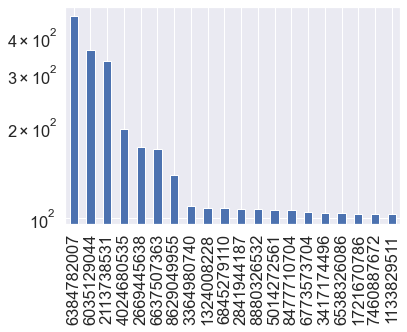

In [88]:
data['homephone'].value_counts().head(20).plot(kind='bar',logy=True)

In [89]:
data = data.drop(columns = 'fulladdress')
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1,1797504115,0
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,3,216537580,0
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0


In [90]:
data.shape

(1000000, 10)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   record       1000000 non-null  int64         
 1   date         1000000 non-null  datetime64[ns]
 2   ssn          1000000 non-null  int64         
 3   firstname    1000000 non-null  object        
 4   lastname     1000000 non-null  object        
 5   address      1000000 non-null  object        
 6   zip5         1000000 non-null  int64         
 7   dob          1000000 non-null  int64         
 8   homephone    1000000 non-null  int64         
 9   fraud_label  1000000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 76.3+ MB


In [92]:
data.describe()

,record,ssn,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,500000.500000,4.914150e+08,50073.333143,1.716682e+07,4.583635e+09,0.014393
std,288675.278933,2.934649e+08,28915.921546,6.353070e+06,3.076022e+09,0.119104
min,1.000000,1.100000e+01,2.000000,1.000000e+00,1.800000e+01,0.000000
25%,250000.750000,2.370395e+08,24992.000000,1.916092e+07,1.857659e+09,0.000000
50%,500000.500000,4.916291e+08,50492.000000,1.950090e+07,4.544521e+09,0.000000
75%,750000.250000,7.457676e+08,74496.000000,1.983032e+07,7.254188e+09,0.000000
max,1000000.000000,9.999999e+08,99999.000000,2.016103e+07,9.999318e+09,1.000000


In [93]:
# data.to_csv('applications clean.csv', index = False)

In [94]:
print('duration: ', dt.datetime.now()-start_time)

duration:  0:00:20.233737
